<a href="https://colab.research.google.com/github/heldhaayu/Project-Prediksi-Penumpang-Kapal-Selamat/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
LIBRARY

In [ ]:
#langkah pertama yang perlu dilakukan yaitu mengimport library dibawah ini igunakan untuk membangun model klasifikasi berbeda.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #digunakan untuk membagi dataset menjadi dua subset
from sklearn.preprocessing import LabelEncoder #mengubah label atau kategori dalam data menjadi angka
from sklearn.neighbors import KNeighborsClassifier #model klasisifikasi
from sklearn.tree import DecisionTreeClassifier #model klasifikasi
from sklearn.ensemble import RandomForestClassifier #model klasifikasi
import xgboost as xgb #model klasifikasi
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# mengimpor berbagai metrik evaluasi yang digunakan untuk mengevaluasi kinerja model
from xgboost import XGBClassifier

LOAD DATA

In [ ]:
#setelah itu selanjutnya adalah panggil data train titanic pada folder laptop untuk membentuk formula
from google.colab import files
uploaded = files.upload()

Saving titanic-train.csv to titanic-train.csv


In [ ]:
#tampilkan data yang sudah dipanggil tadi
data_train = pd.read_csv('titanic-train.csv')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#untuk mengetahui dan menghitung berapa banyak nilai data yang hilang atau yang kosong
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# untuk mengetahui informasi rinci pada dataset atau DataFrame
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


DATA CLEANING

Setelah mengetahui info dari diatas, selanjutny adalah melakukan data cleaning untuk membersihkan data agar valid dan akurat:

1.   nilai yang kosong age diisi menggunakan mean, karena  data numerik, memiliki distribusi normal.
2.   drop colom cabin karena tidak memiliki pengaruh pada tujuan dan memiliki nilai kosong yang lbh dari setengah
3. drop colom embarked, ticket, name, dan pessenger id karena tidak memiliki pengaruh pada tujuan



In [ ]:
data_train['Age'].fillna(data_train['Age'].mean(), inplace=True)
data_train.drop(columns=['Embarked', 'Ticket', 'Name','Cabin', 'PassengerId'], inplace=True)

In [ ]:
#Menggunakan LabelEncoder untuk mengubah kolom Sex menjadi numerik, karena untuk mengklasifikasi harus numerik
le = LabelEncoder()
data_train['Sex'] = le.fit_transform(data_train['Sex'])

In [ ]:
#setelah itu cek, bahwa type data sex  telah menjadi numerik
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


DATA MODELING

In [ ]:
#setelah itu, Memisahkan fitur (X) dan target (y) dari dataset train dengan survived pada tujuan
X = data_train.drop('Survived', axis=1)
y = data_train['Survived']

In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [ ]:
#split data atau Memisahkan fitur dari dataset test, untuk menghindari kesalahan penilaian yang mungkin terjadi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

membuat model untuk menguji empat model klasifikasi: K-Nearest Neighbors (KNN), Decision Tree, Random Forest, dan XGBoost. Hasil dr disimpan dalam knn_pred, dt_pred, rf_pred, dan xgb_pred.

In [ ]:
#K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

#Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

#XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

kode dibawah ini untuk mengukur kinerja masing-masing model klasifikasi. sehingga dapat membandingkan model yang paling sesuai dan relevan/yg terbaik

In [ ]:
#K-Nearest Neighbors (KNN)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)

#Decision Tree
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)

#Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)

#XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)

memanggil hasil evaluasi

In [ ]:
print(f'logistik regression Accuracy: {knn_accuracy}')
print(f'logistik regression precision: {knn_precision}')
print(f'logistik regression recall: {knn_recall}')
print(f'logistik regression f1 score: {knn_f1}\n')

print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Decision Tree precision: {dt_precision}')
print(f'Decision Tree recall: {dt_recall}')
print(f'Decision Tree f1 score: {dt_f1}\n')

print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'Random Forest precision: {rf_precision}')
print(f'Random Forest recall: {rf_recall}')
print(f'Random Forest f1 score: {rf_f1}\n')

print(f'XGB Accuracy: {xgb_accuracy}')
print(f'XGB precision: {xgb_precision}')
print(f'XGB recall: {xgb_recall}')
print(f'XGB f1 score: {xgb_f1}')

K-NN Accuracy: 0.6927374301675978
K-NN precision: 0.6557377049180327
K-NN recall: 0.5405405405405406
K-NN f1 score: 0.5925925925925926

Decision Tree Accuracy: 0.7653631284916201
Decision Tree precision: 0.7285714285714285
Decision Tree recall: 0.6891891891891891
Decision Tree f1 score: 0.7083333333333334

Random Forest Accuracy: 0.7877094972067039
Random Forest precision: 0.7647058823529411
Random Forest recall: 0.7027027027027027
Random Forest f1 score: 0.7323943661971832

XGB Accuracy: 0.8044692737430168
XGB precision: 0.7671232876712328
XGB recall: 0.7567567567567568
XGB f1 score: 0.761904761904762


In [ ]:
actual = y_test  # Actual target values
# Create confusion matrices
knn_cm = confusion_matrix(actual, knn_pred)
dt_cm = confusion_matrix(actual, dt_pred)
rf_cm = confusion_matrix(actual, rf_pred)
xgb_cm = confusion_matrix(actual, xgb_pred)

# Convert confusion matrices to DataFrames
def confusion_matrix_to_dataframe(cm):
    labels = sorted(set(actual))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    return df_cm

# Convert confusion matrices to DataFrames with labels
knn_cm_df = confusion_matrix_to_dataframe(knn_cm)
dt_cm_df = confusion_matrix_to_dataframe(dt_cm)
rf_cm_df = confusion_matrix_to_dataframe(rf_cm)
xgb_cm_df = confusion_matrix_to_dataframe(xgb_cm)

confusion matrix: tabel yang digunakan untuk mengukur seberapa baik model dalam memprediksi kelas-kelas target

In [ ]:
lr_cm_df

Predicted,0,1
Actual,,
0,84,21
1,34,40


In [ ]:
dt_cm_df

Predicted,0,1
Actual,,
0,86,19
1,23,51


In [ ]:
rf_cm_df

Predicted,0,1
Actual,,
0,89,16
1,22,52


In [ ]:
c

Predicted,0,1
Actual,,
0,88,17
1,18,56


Tujuannya dari analysis ini adalah untuk mengetahui penumpang yang Survived dalam titanic. dari 4 model klasifikasi yang telah dievaluasi, yaitu K-NN, Decision Tree, Random Forest, dan XGBoost. Masing-masing model memiliki sejumlah metrik evaluasi kinerja yang berbeda, termasuk nilai akurasi, presisi, recall, dan skor F1.

Sehubung dengan tujuannya yaitu agar mengetahui penumpang yang survived dalam titanic, maka yang cocok dalam hal ini yaitu nilai model evaluasi "Recall". Recal sendiri adalah mengukur sejauh mana model dapat mengidentifikasi semua instance positif yang sebenarnya, berguna ketika Anda ingin meminimalkan false negative, berarti penumpang yang selamat dianggap tidak selamat, sehingga mereka mendapatkan bantuan.
Berdasarkan hasil evaluasinya recall yang memiliki nilai paling tinggi ada pada XGBoost dengan nilai recall 0.75675  dan dari tabel confusion matrix dapat dilihat false negativenya adalah 18, yang berarti ada 18 penumpang yang sebenarnya selamat, tetapi memprediksi mereka sebagai tidak selamat.




In [ ]:
#selanjutnya ialah mealkukan future importance untuk mengetahui variable mana yang penting dan berpengaruh
xgb_feature_importance = xgb_model.feature_importances_
feature_names = X.columns

xgb_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_feature_importance})
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)
xgb_feature_importance_df

,Feature,Importance
1,Sex,0.607934
0,Pclass,0.211049
3,SibSp,0.077918
2,Age,0.036462
5,Fare,0.034414
4,Parch,0.032223


MENENTEKUN VARIABLE YANG BERPENGARUH ATAU TIDAKNYA DILIAT DARI DATA DIATAS:
1. Sex: adalah jenis kelamin dengan nilai impotance yang tinggi yaitu 0,60. variable ini berpengaruh karena jika kita liat dari perbedaan stamina dan fisik, yaitu fisik wanita lebih lemah, sedangkat pada pria lebih kuat. Selain itu mungkin juga terjadi pada kebijakan kapal yang biasanya memprioritaskan perwmpuam dan anak anak terlabih dahulu. maka dari itu perlu dilakukannya pelatihan darurat ketika terjadi bencana dan juga arahan untuk para penumpang

2. Pclass:Ini menunjukkan bahwa kelas sosial penumpang juga memainkan peran penting dalam kemungkinan bertahan hidup. Orang-orang dalam kelas yang lebih tinggi mungkin memiliki peluang bertahan hidup yang lebih besar.

3. SibSp: ini memiliki pengaruh lebih rendah dibandingkan dengan Sex dan Pclass, tetapi masih memiliki dampak yang cukup signifikan. Jumlah saudara atau pasangan yang ada di kapal dapat mempengaruhi peluang bertahan hidup, mungkin karena upaya penyelamatan keluarga.

4. Age : Ini menunjukkan bahwa usia penumpang memiliki dampak yang lebih rendah pada prediksi "Survived." Dengan adannya kebijkan kapal yang mendahulukan lansia, anak dan perempuan lebih dulu, sedangkan yang lebih muda memiliki stamina yang lebih kuat sehingga dapat bergerak lebih cepat.

5. Fare: Ini mungkin menggambarkan bahwa tarif yang lebih tinggi tidak selalu menjamin keselamatan. tetapi tetap perlu diprioritaskan dalam keselamat sesuai prosedur yg ada pada kapal.

6. Pearch: Jumlah orang tua atau anak yang menemani penumpang memiliki dampak yang lebih rendah dalam prediksi bertahan hidup.

LOAD DATA

In [ ]:
#mengupload data test
from google.colab import files
uploaded = files.upload()

Saving titanic-test.csv to titanic-test.csv


In [ ]:
#menampilkan dan memanggil data test
data_test = pd.read_csv('titanic-test.csv')
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
##untuk mengetahui informasi rinci pada data
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#untuk mengetahui dan menghitung berapa banyak nilai data yang hilang atau yang kosong
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

DATA CLEANING

1. drop colom cabin karena tidak memiliki pengaruh pada tujuan dan memiliki nilai kosong yang lbh dari setengah.
2. drop colom embarked, ticket, name, dan pessenger id karena tidak memiliki pengaruh pada tujuan

In [ ]:
data_test.drop(columns=['Embarked', 'Ticket', 'Name','Cabin', 'PassengerId'], inplace=True)

 selanjutnya adalah melakukan data cleaning untuk membersihkan data agar valid dan akurat:

1.   nilai age diisi menggunakan mean, karena  data numerik, memiliki distribusi normal.
2. Nilai Fare diisi menggunakan mode/modus, variabel kategorikal atau variabel numerik dengan jumlah nilai unik yang sedikit.

In [ ]:
data_test['Age'].fillna(data_test['Age'].mean(), inplace=True)
data_test['Fare'].fillna(data_test['Fare'].mode()[0], inplace=True)

In [ ]:
##Menggunakan LabelEncoder untuk mengubah kolom Sex menjadi numerik, karena untuk mengklasifikasi harus numerik
data_test['Sex'] = le.fit_transform(data_test['Sex'])

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [ ]:
data_test.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

membuat code dibawah ini untuk melakukan prediksi model terbaik yang menggunakan model XGBoost (xgb_model) pada data pengujian (data_test) dan kemudian menggabungkan prediksi tersebut dengan dataset data_test.

In [ ]:
xgb_predictions = xgb_model.predict(data_test)
combined_data = data_test.copy()  # Copy the new dataset
combined_data['XGB_Predictions'] = xgb_predictions
combined_data

,Pclass,Sex,Age,SibSp,Parch,Fare,XGB_Predictions
0,3,1,34.50000,0,0,7.8292,0
1,3,0,47.00000,1,0,7.0000,0
2,2,1,62.00000,0,0,9.6875,0
3,3,1,27.00000,0,0,8.6625,1
4,3,0,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0
414,1,0,39.00000,0,0,108.9000,1
415,3,1,38.50000,0,0,7.2500,0
416,3,1,30.27259,0,0,8.0500,0


DATA VUZUALITATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

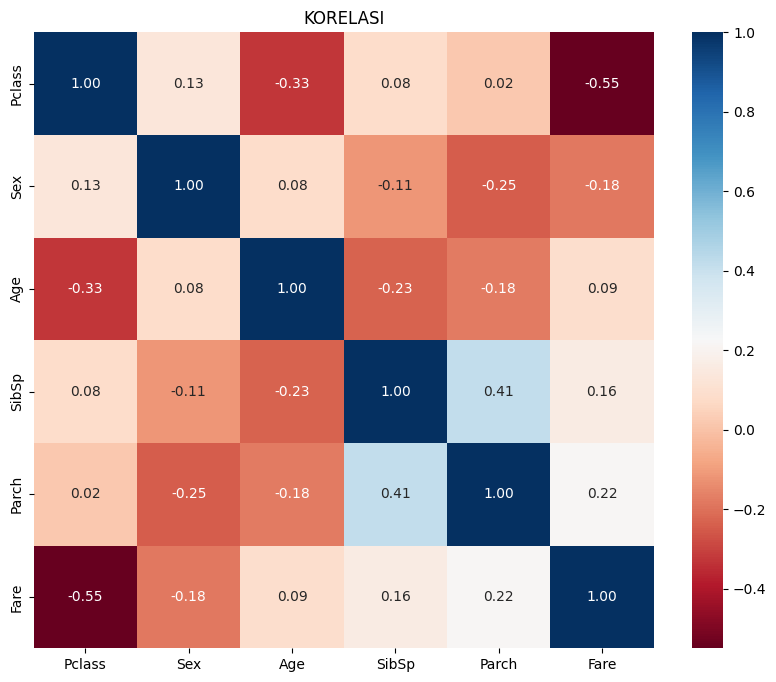

In [ ]:
corr = X.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr,annot=True, cmap = 'RdBu', fmt='.2f')
plt.title('KORELASI')
plt.show()